In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
# Charger les données
df = pd.read_csv("creditcard.csv")

In [3]:
# Séparer les features et la cible
X = df.drop('Class', axis=1)
y = df['Class']

In [4]:
# Normaliser les colonnes Time et Amount
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [5]:
# Division en training/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [6]:
# Application de SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [7]:
# Définir les modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}


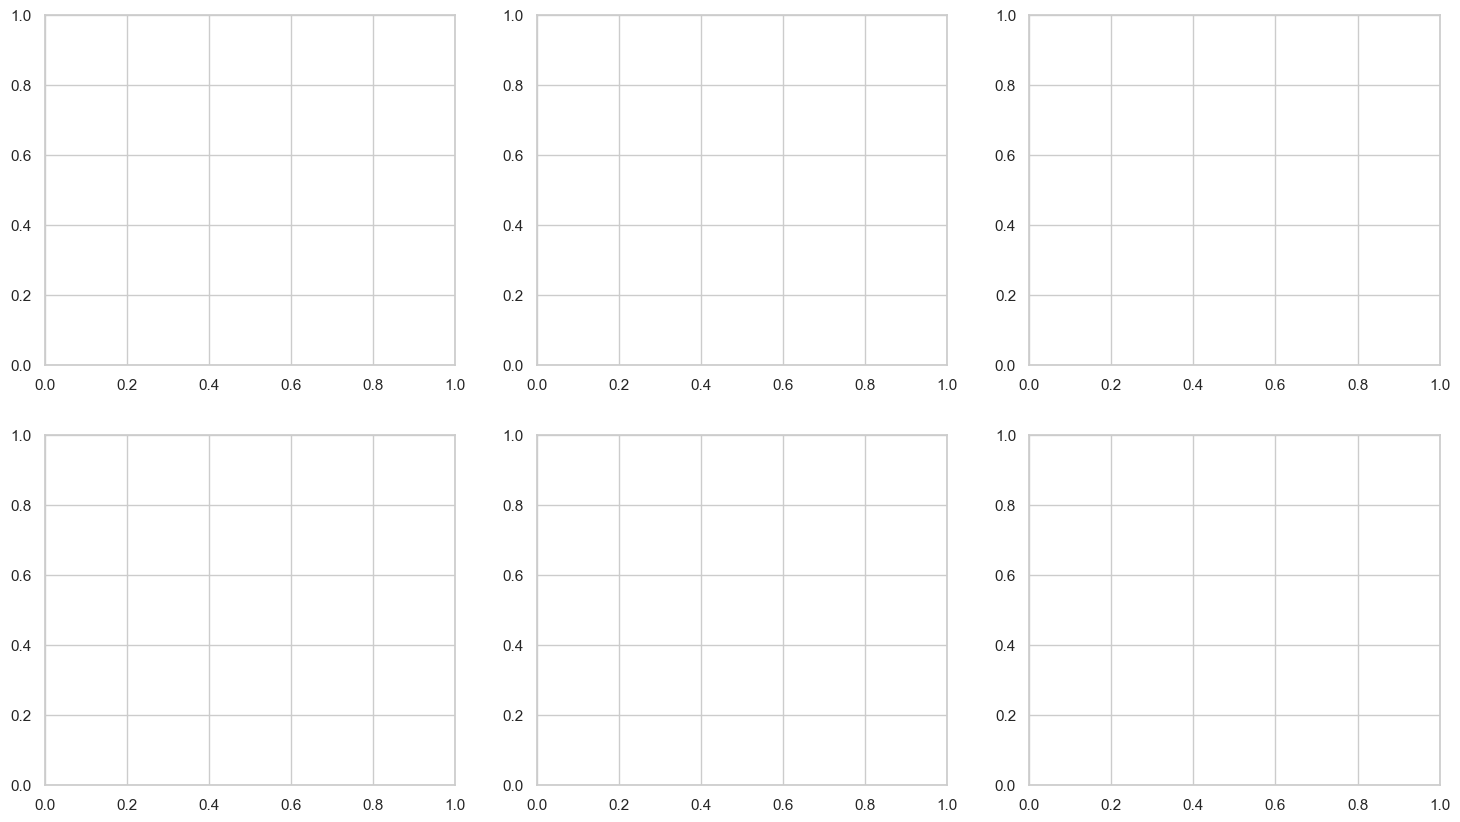

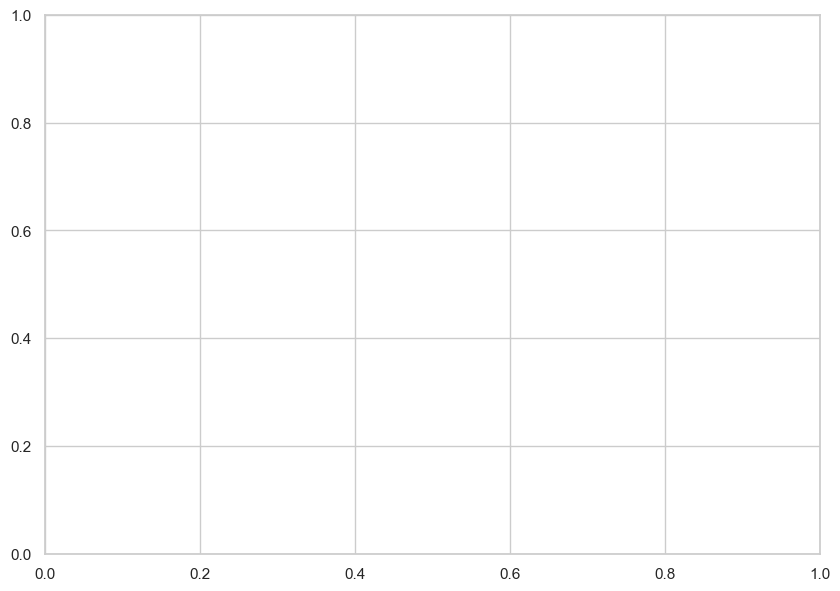

In [8]:
# Configuration graphique
import seaborn as sns
sns.set_theme(style="whitegrid")
fig_cm, axs_cm = plt.subplots(2, 3, figsize=(18, 10))
fig_roc, ax_roc = plt.subplots(figsize=(10, 7))

In [9]:
# Pour ROC
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

In [ ]:
# Entraînement, prédiction, évaluation
for i, (name, model) in enumerate(models.items()):
    print(f"\n=== {name} ===")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)



=== Random Forest ===

=== Decision Tree ===

=== K-Nearest Neighbors ===


In [ ]:
 # Évaluation
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))

In [ ]:
  # Matrice de confusion
    ax = axs_cm[i // 3][i % 3]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Prédiction')
    ax.set_ylabel('Vérité')


In [ ]:
 # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

In [ ]:
# Courbe ROC globale
ax_roc.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
ax_roc.set_title('Courbes ROC')
ax_roc.set_xlabel('Taux de faux positifs')
ax_roc.set_ylabel('Taux de vrais positifs')
ax_roc.legend(loc='lower right')

In [ ]:
# Affichage
plt.tight_layout()
plt.show()